## A simple Classification task
this toy example is quite relative to the classification models being built by food companies


Our goal in this notebook is to create a classification model that can predict the correct type of fruit for any given observation of the features(attributes/columns in sample) of the fruits such as mass, width, height etc

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
print(fruits.size)
print(fruits.shape)
print(fruits.dtypes)

413
(59, 7)
fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object


In [3]:
fruits.fruit_label.unique()

array([1, 2, 3, 4])

### create a mapping from fruit label value to fruit name as dictionaries to make results easier to interpret
using the dict(zip(key,values)) method we can do this easily 

In [4]:

fruit_name_lookup = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [5]:
print(fruit_name_lookup)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


### Creating train-test split for train and test set 
in real world we would have train, dev(CV) and test set.. where we will use train set to check for bias and dev set for variance 

- X is in uppercase because it is more than 1 dimension
- and y is in lower case because its 1 dimensional

In [6]:
X = fruits[['mass', 'width', 'height', 'color_score']] # put these columns in x
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Examining the data - visualization and feature analysis 

- When working on a data for a ML problem, it is always good to look at the data, this helps to inspect the features and identify what cleaning or preprocessing that needs to be done.
- Also you might notice missing or noisy data, or inconsistencies such as a wrong data type being used for a column, incorrect units of measurements or not enough examples for a particular class
- You may also realize that your problem is solvable without machine learning.


we will be using a feature fair plot which is good for data with small size

In [8]:
from pandas.plotting import scatter_matrix

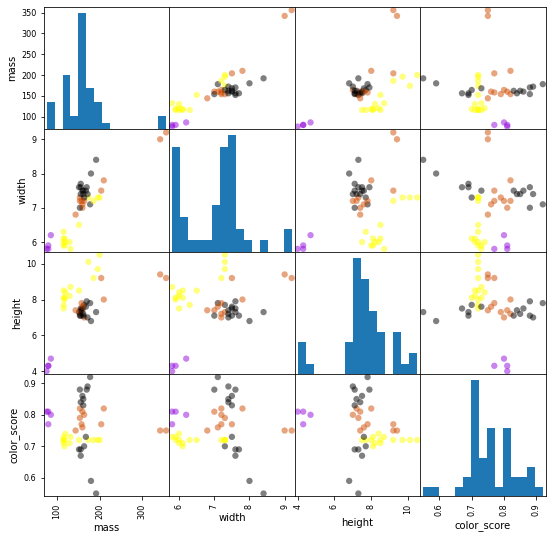

In [9]:
# plotting a scatter matrix
from matplotlib import cm # for color map
%matplotlib inline

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins': 15}, figsize=(9,9), cmap=cmap)

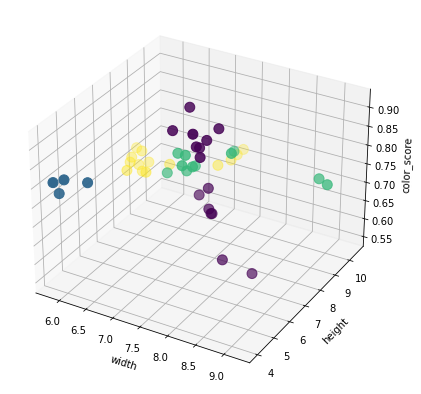

In [10]:
#plotting a 3D scatter plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker ='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

#### you can use shift tab to check the description of a method

## Now lets build our classifier

In [11]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### create classifier object 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Lets train the classifier(fit the estimator) using the training sets

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### now lets estimate the accuracy of the classifier on future data 

In [14]:
knn.score(X_test, y_test)

0.5333333333333333

### now lets used the trained classifier model to predict unseen data

In [15]:
# first example: a small fruit with 20g of mass, 4.3cm width, and 5.5cm height

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
fruit_name_lookup[fruit_prediction[0]]

/Users/mine/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [16]:
print(fruit_prediction)

[2]


In [17]:
print(fruit_name_lookup)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [18]:
#second example a small fruit with 100g mass, 6.5 width, 7.5 height

fruit_prediction2 = knn.predict([[100, 6.5, 7.5]])
fruit_name_lookup[fruit_prediction2[0]]

/Users/mine/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

### lets plot the decision boundaries of our classifier using a library from UNIMICH

/Users/mine/env/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


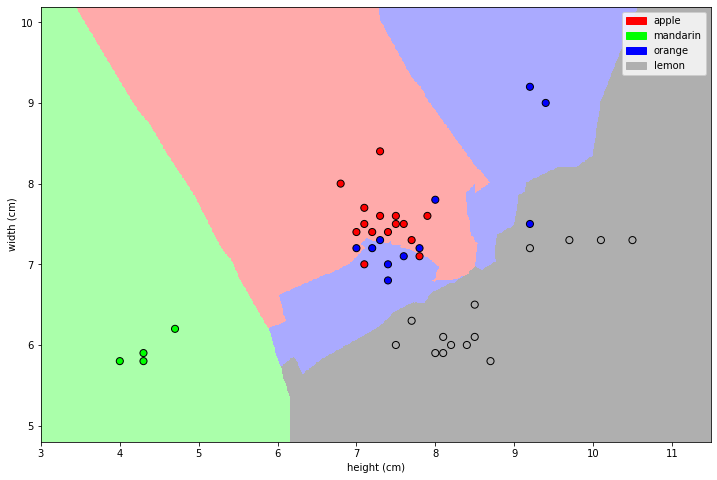

In [19]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform') # uniform is the distribution of the weights, we can choose another
# or give it our function

### changing from .as_matrix to . values or .to_numpy works, read this library later

## How sensitive is our KNN with respect to K?

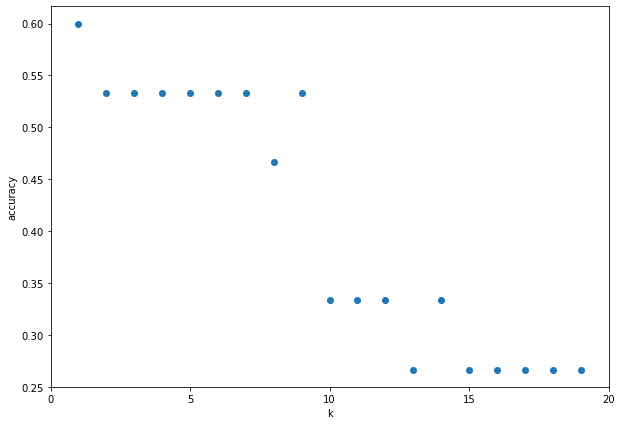

In [23]:
k_range = range(1,20) # specifying a range of numbers for k
scores = [] #empty list to compute our list of scores 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,7))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]); # the semi colon is 

## How sensitive is K with respect to the proportion of our train test split

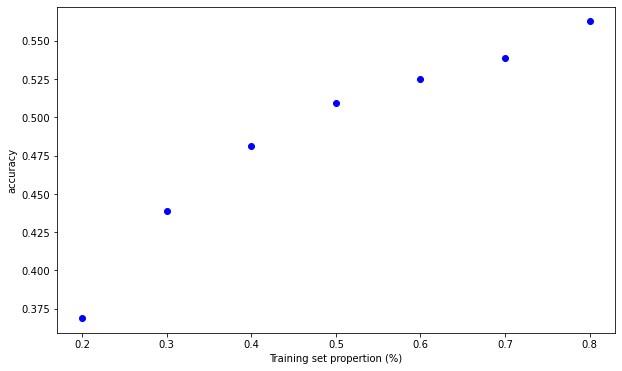

In [29]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure(figsize=(10,6))

for s in t:
    
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### so if we had a bigger dataset, we will get a better model.. great!